# Algoritmos de optimización - Reto 2

Nombre: Guillermo Rios Gómez <br>
Github: https://github.com/guirigomez/Alg_Optimizacion_Retos.git <br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

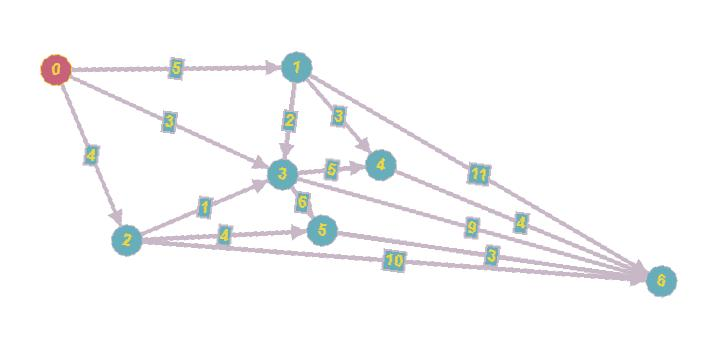

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
from mpl_toolkits.mplot3d import Axes3D

Primera prueba:
Costo mínimo: 11
Ruta óptima: [0, 2, 5, 6]


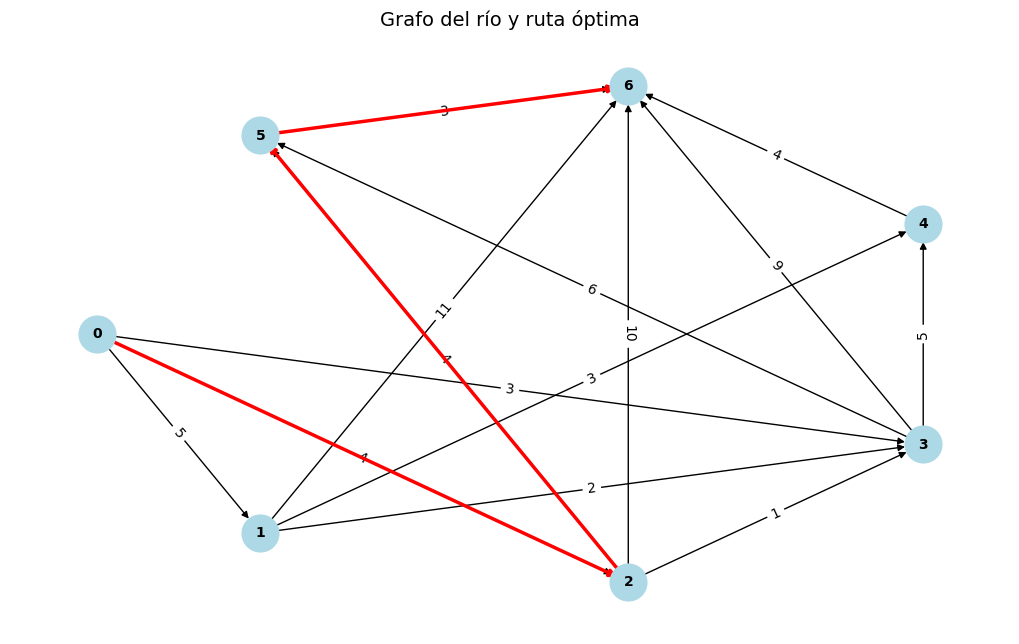

Segunda prueba:
Costo mínimo: 7
Ruta óptima: [0, 1, 4, 5]


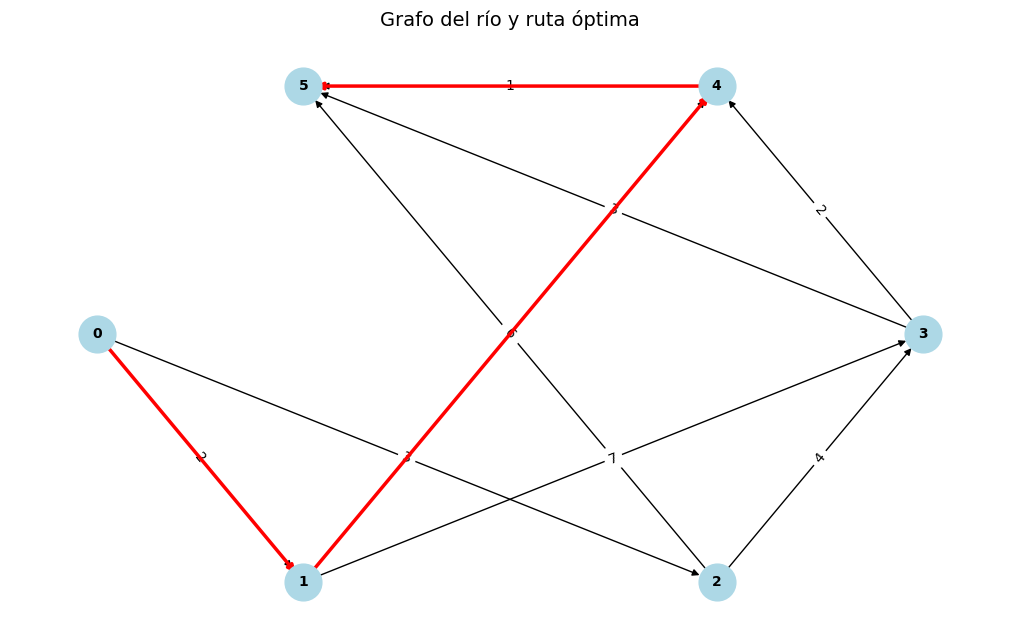

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################
# Programación Dinámica: Problema del Viaje por el Río
# Este código implementa una solución utilizando la técnica de programación dinámica para optimizar el costo de un viaje por un río.
# Autor: [Tu Nombre]

def viaje_por_rio(costos):
    """
    Encuentra el costo mínimo de viajar desde el inicio hasta el destino en un río segmentado.

    :param costos: matriz de costos, donde costos[i][j] indica el costo de viajar de i a j.
    :return: costo mínimo y la ruta correspondiente
    """
    n = len(costos)
    dp = [float('inf')] * n  # Arreglo para almacenar el costo mínimo hasta cada punto
    ruta = [-1] * n  # Arreglo para reconstruir el camino

    dp[0] = 0  # El costo de empezar en el punto inicial es 0

    for i in range(n):
        for j in range(i + 1, n):
            if costos[i][j] > 0 and dp[i] + costos[i][j] < dp[j]:
                dp[j] = dp[i] + costos[i][j]
                ruta[j] = i

    # Reconstruir la ruta
    camino = []
    actual = n - 1
    while actual != -1:
        camino.append(actual)
        actual = ruta[actual]

    return dp[-1], list(reversed(camino))

def graficar_ruta(costos, ruta):
    """
    Dibuja el grafo y resalta la ruta óptima encontrada.

    :param costos: matriz de costos
    :param ruta: lista con los nodos de la ruta óptima
    """
    G = nx.DiGraph()

    # Definir nodos y aristas en orden específico
    edges = []
    for i in range(len(costos)):
        for j in range(len(costos[i])):
            if costos[i][j] > 0:
                edges.append((i, j, costos[i][j]))

    G.add_weighted_edges_from(edges)

    pos = nx.shell_layout(G)  # Usar un layout más ordenado

    plt.figure(figsize=(10, 6))

    # Dibujar nodos y todas las aristas
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f'{d}' for i, j, d in edges})

    # Resaltar la ruta óptima
    ruta_pares = [(ruta[i], ruta[i + 1]) for i in range(len(ruta) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=ruta_pares, edge_color='red', width=2.5)

    plt.title("Grafo del río y ruta óptima", fontsize=14)
    plt.show()

# Primera prueba del algoritmo de programación dinámica
costos_1 = [
    [0, 5, 4, 3, 0, 0, 0],  # Nodo 0
    [0, 0, 0, 2, 3, 0, 11], # Nodo 1
    [0, 0, 0, 1, 0, 4, 10], # Nodo 2
    [0, 0, 0, 0, 5, 6, 9],  # Nodo 3
    [0, 0, 0, 0, 0, 0, 4],  # Nodo 4
    [0, 0, 0, 0, 0, 0, 3],  # Nodo 5
    [0, 0, 0, 0, 0, 0, 0]   # Nodo 6
]

costo_min_1, ruta_optima_1 = viaje_por_rio(costos_1)
print("Primera prueba:")
print("Costo mínimo:", costo_min_1)
print("Ruta óptima:", ruta_optima_1)

graficar_ruta(costos_1, ruta_optima_1)

# Segunda prueba del algoritmo de programación dinámica
costos_2 = [
    [0, 2, 3, 0, 0, 0],  # Nodo 0
    [0, 0, 0, 7, 4, 0],  # Nodo 1
    [0, 0, 0, 4, 0, 6],  # Nodo 2
    [0, 0, 0, 0, 2, 3],  # Nodo 3
    [0, 0, 0, 0, 0, 1],  # Nodo 4
    [0, 0, 0, 0, 0, 0]   # Nodo 5
]

costo_min_2, ruta_optima_2 = viaje_por_rio(costos_2)
print("Segunda prueba:")
print("Costo mínimo:", costo_min_2)
print("Ruta óptima:", ruta_optima_2)

graficar_ruta(costos_2, ruta_optima_2)

## Descenso del gradiente

In [3]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [4]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

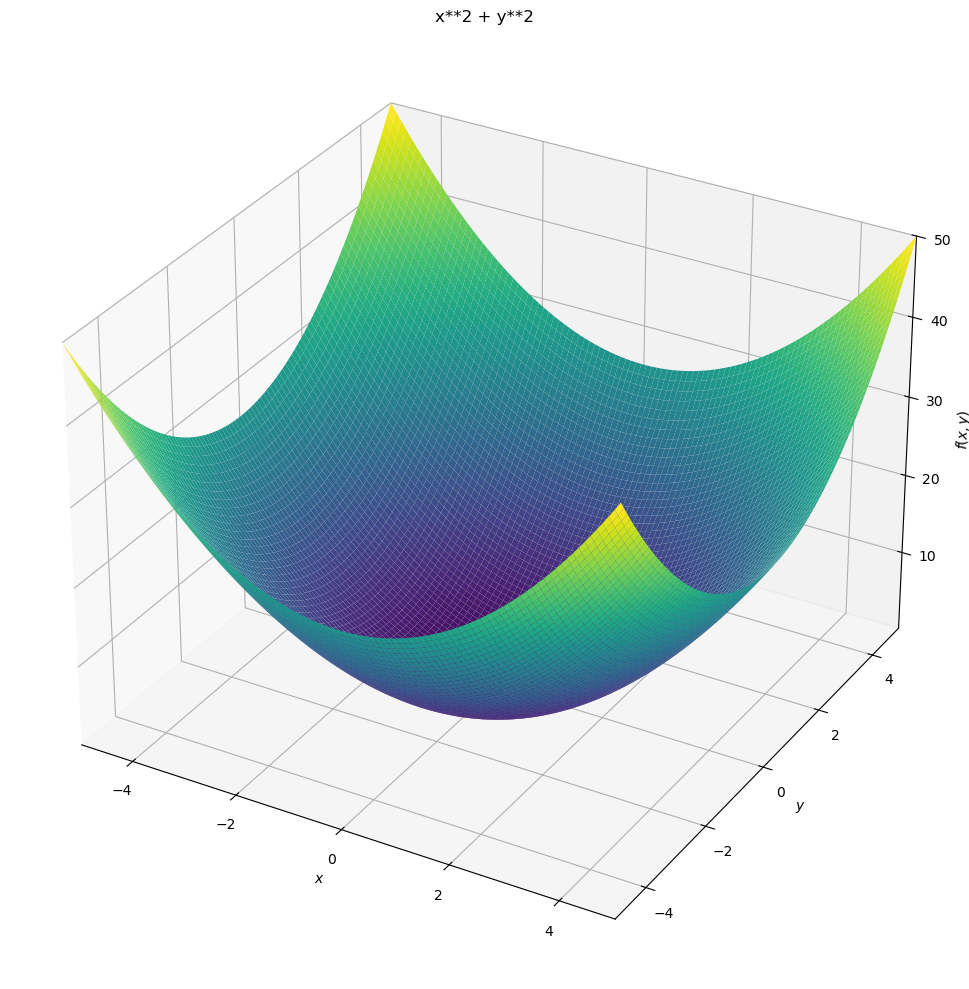

In [5]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

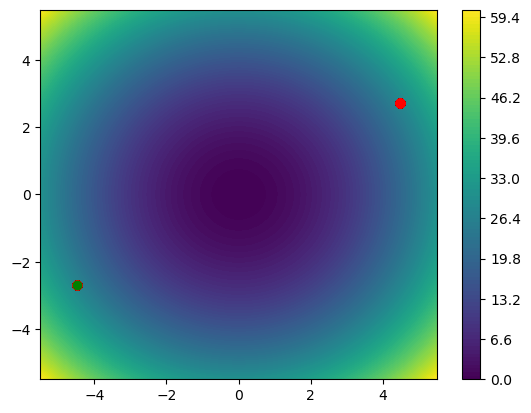

Solucion: [-4.469368171273098, -2.708272748536358] 27.30999313085372


In [6]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
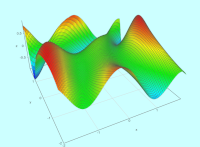


Prueba 1: Descenso del gradiente para f(X, Y)


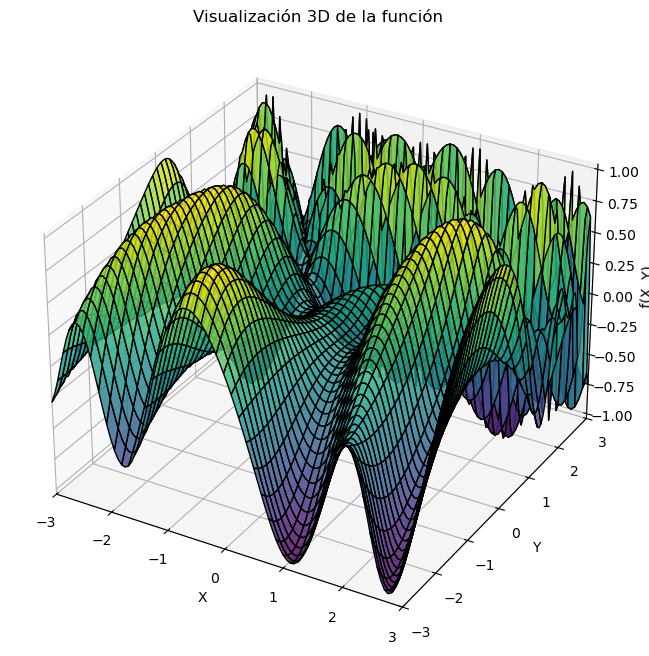

Punto óptimo para la prueba 1: [2.20175661 1.68704637]
Recorrido del descenso (prueba 1): [array([1., 1.]), array([1.00894782, 0.99604293]), array([1.01775957, 0.99231906]), array([1.02641917, 0.98883886]), array([1.0349128 , 0.98561041]), array([1.0432289 , 0.98263956]), array([1.05135814, 0.97993   ]), array([1.05929341, 0.97748344]), array([1.06702963, 0.97529981]), array([1.07456369, 0.97337745]), array([1.08189427, 0.97171329]), array([1.08902164, 0.97030303]), array([1.09594756, 0.96914139]), array([1.10267503, 0.96822222]), array([1.10920816, 0.96753871]), array([1.11555199, 0.96708352]), array([1.12171235, 0.96684892]), array([1.12769568, 0.96682692]), array([1.13350892, 0.96700935]), array([1.1391594 , 0.96738799]), array([1.1446547 , 0.96795461]), array([1.15000258, 0.96870106]), array([1.1552109 , 0.96961932]), array([1.16028753, 0.97070154]), array([1.16524029, 0.97194006]), array([1.17007694, 0.97332748]), array([1.17480505, 0.97485663]), array([1.17943208, 0.97652063]), a

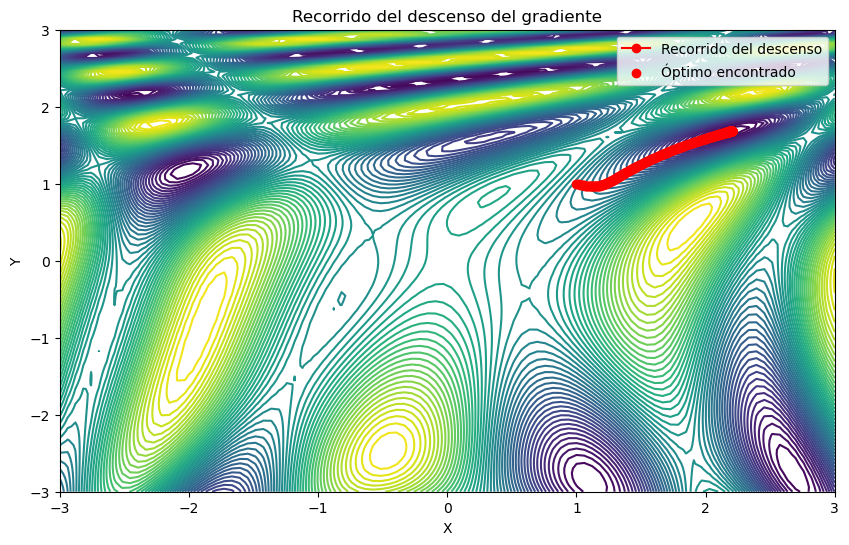

Prueba 2: Descenso del gradiente para f(X, Y)


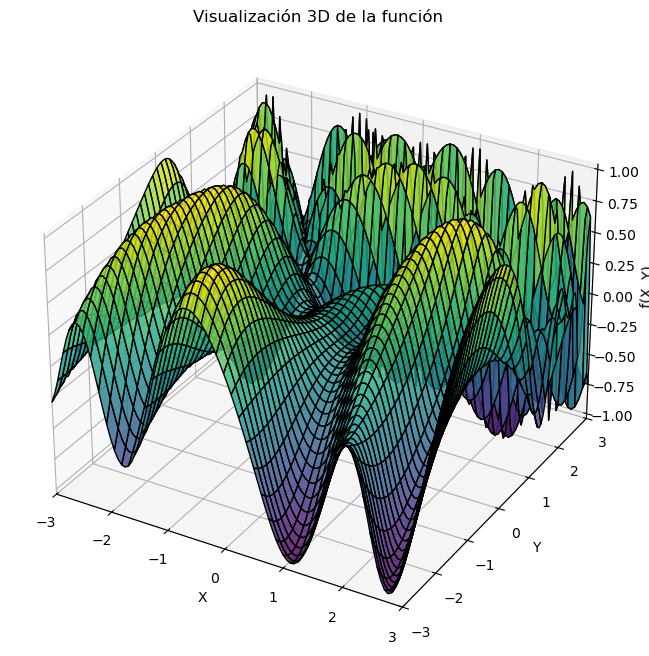

Punto óptimo para la prueba 2: [-0.04138761  2.33689188]
Recorrido del descenso (prueba 2): [array([-1.,  2.]), array([-1.00621141,  2.04212571]), array([-1.00837687,  2.07951859]), array([-1.00657274,  2.10749806]), array([-1.00178298,  2.12532084]), array([-0.9952264 ,  2.13560566]), array([-0.98780578,  2.14147662]), array([-0.9800376 ,  2.14508559]), array([-0.97218133,  2.14761161]), array([-0.9643583 ,  2.14963356]), array([-0.95662226,  2.15141966]), array([-0.94899544,  2.15308999]), array([-0.94148588,  2.15469712]), array([-0.9340954,  2.1562637]), array([-0.92682316,  2.15779947]), array([-0.91966724,  2.15930869]), array([-0.91262528,  2.16079333]), array([-0.90569483,  2.16225444]), array([-0.89887339,  2.16369269]), array([-0.8921585,  2.1651086]), array([-0.88554775,  2.16650262]), array([-0.8790388,  2.1678752]), array([-0.87262935,  2.16922677]), array([-0.86631717,  2.17055773]), array([-0.86010008,  2.17186852]), array([-0.85397597,  2.17315952]), array([-0.84794277,

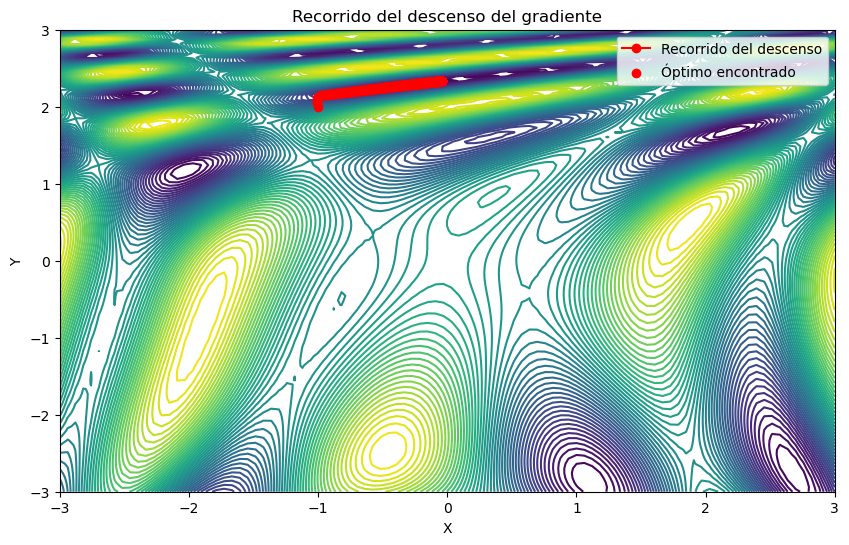

In [7]:
#Definimos la funcion
def graficar_funcion_3d(f, rango_x, rango_y):
    """
    Grafica la función f en 3D.

    :param f: Función a graficar
    :param rango_x: Rango para x
    :param rango_y: Rango para y
    """
    x = np.linspace(rango_x[0], rango_x[1], 100)
    y = np.linspace(rango_y[0], rango_y[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f([i, j]) for i, j in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.set_xlim(rango_x)
    ax.set_ylim(rango_y)
    ax.set_title("Visualización 3D de la función")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    plt.show()

def graficar_recorrido_2d(puntos, f):
    """
    Grafica el recorrido del descenso del gradiente en 2D.

    :param puntos: Lista de puntos visitados durante el descenso
    :param f: Función objetivo
    """
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f([i, j]) for i, j in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    puntos = np.array(puntos)
    plt.plot(puntos[:, 0], puntos[:, 1], 'ro-', label='Recorrido del descenso')
    plt.scatter(puntos[-1, 0], puntos[-1, 1], color='red', label='Óptimo encontrado')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.title("Recorrido del descenso del gradiente")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

# Descenso del Gradiente para función compleja con visualización

def descenso_gradiente_visual(funcion, gradiente, x_inicial, lr=0.01, tol=1e-6, max_iter=1000):
    """
    Descenso del gradiente con visualización de recorrido.

    :param funcion: Función objetivo
    :param gradiente: Gradiente de la función objetivo
    :param x_inicial: Punto inicial
    :param lr: Tasa de aprendizaje
    :param tol: Tolerancia para la convergencia
    :param max_iter: Número máximo de iteraciones
    :return: Óptimo encontrado y lista de puntos visitados
    """
    x = np.array(x_inicial, dtype=float)
    puntos = [x.copy()]
    for _ in range(max_iter):
        grad = np.array([g(x) for g in gradiente], dtype=float)
        x_nuevo = x - lr * grad
        puntos.append(x_nuevo.copy())
        if np.linalg.norm(x_nuevo - x) < tol:
            return x_nuevo, puntos
        x = x_nuevo
    return x, puntos

# Función y gradiente para las pruebas
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))
gradiente = [
    lambda X: math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * (X[0]) * math.cos(2 * X[0] + 1 - math.exp(X[1])) - \
               math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.sin(2 * X[0] + 1 - math.exp(X[1])) * 2,
    lambda X: -math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * (X[1] / 2) * math.cos(2 * X[0] + 1 - math.exp(X[1])) + \
               math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.sin(2 * X[0] + 1 - math.exp(X[1])) * math.exp(X[1])
]

# Prueba 1
print("Prueba 1: Descenso del gradiente para f(X, Y)")
graficar_funcion_3d(f, [-3, 3], [-3, 3])

x_inicial_1 = [1, 1]  # Punto inicial para el descenso
x_optimo_1, puntos_1 = descenso_gradiente_visual(f, gradiente, x_inicial_1, lr=0.01)
print("Punto óptimo para la prueba 1:", x_optimo_1)
print("Recorrido del descenso (prueba 1):", puntos_1)

graficar_recorrido_2d(puntos_1, f)

# Prueba 2
print("Prueba 2: Descenso del gradiente para f(X, Y)")
graficar_funcion_3d(f, [-3, 3], [-3, 3])

x_inicial_2 = [-1, 2]  # Segundo punto inicial para el descenso
x_optimo_2, puntos_2 = descenso_gradiente_visual(f, gradiente, x_inicial_2, lr=0.01)
print("Punto óptimo para la prueba 2:", x_optimo_2)
print("Recorrido del descenso (prueba 2):", puntos_2)

graficar_recorrido_2d(puntos_2, f)
